# Product Selection-KNN Algorithm

### Import modules

In [54]:
import pandas as pd
from scipy.io import arff
import numpy as np
import math
import operator
import seaborn as sns

### Data loading

In [55]:
data=arff.loadarff("./product-selection/trainProdSelection.arff")
train_df = pd.DataFrame(data[0])
data=arff.loadarff("./product-selection/testProdSelection.arff")
test_df = pd.DataFrame(data[0])

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 7 columns):
Type         186 non-null object
LifeStyle    186 non-null object
Vacation     186 non-null float64
eCredit      186 non-null float64
salary       186 non-null float64
property     186 non-null float64
label        186 non-null object
dtypes: float64(4), object(3)
memory usage: 10.2+ KB


### Encoding and scaling on train data

In [57]:
train_df.Type=train_df.Type.str.decode("UTF-8")

In [58]:
train_df.LifeStyle=train_df.LifeStyle.str.decode("UTF-8")
train_df.label=train_df.label.str.decode("UTF-8")


In [59]:
train_df.head()


,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,6.0,40.0,13.62,3.2804,C1
1,student,spend>saving,11.0,21.0,15.32,2.0232,C1
2,student,spend>saving,7.0,64.0,16.55,3.1202,C1
3,student,spend>saving,3.0,47.0,15.71,3.4022,C1
4,student,spend>saving,15.0,10.0,16.96,2.2825,C1


In [60]:
minValue=train_df.Vacation.min()
maxValue=train_df.Vacation.max()
train_df.Vacation=train_df.Vacation.apply(lambda x:(x-minValue)/(maxValue-minValue))


In [61]:
minValue=train_df.eCredit.min()
maxValue=train_df.eCredit.max()
train_df.eCredit=train_df.eCredit.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [62]:
minValue=train_df.salary.min()
maxValue=train_df.salary.max()
train_df.salary=train_df.salary.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [63]:
minValue=train_df.property.min()
maxValue=train_df.property.max()
train_df.property=train_df.property.apply(lambda x:(x-minValue)/(maxValue-minValue))


In [64]:
train_df.head()


,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,0.079365,0.107558,0.219960,0.183167,C1
1,student,spend>saving,0.158730,0.052326,0.293102,0.112797,C1
2,student,spend>saving,0.095238,0.177326,0.346023,0.174200,C1
3,student,spend>saving,0.031746,0.127907,0.309882,0.189984,C1
4,student,spend>saving,0.222222,0.020349,0.363663,0.127311,C1


### Encoding and scaling on test data

In [65]:
test_df.Type=test_df.Type.str.decode("UTF-8")


In [66]:
test_df.LifeStyle=test_df.LifeStyle.str.decode("UTF-8")
test_df.label=test_df.label.str.decode("UTF-8")

In [67]:
minValue=test_df.Vacation.min()
maxValue=test_df.Vacation.max()
test_df.Vacation=test_df.Vacation.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [68]:
minValue=test_df.eCredit.min()
maxValue=test_df.eCredit.max()
test_df.eCredit=test_df.eCredit.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [69]:
minValue=test_df.salary.min()
maxValue=test_df.salary.max()
test_df.salary=test_df.salary.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [70]:
minValue=test_df.property.min()
maxValue=test_df.property.max()
test_df.property=test_df.property.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [71]:
test_df.head()


,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend<saving,0.20,0.058824,0.104637,0.398926,C1
1,student,spend>>saving,0.54,0.021008,0.175059,0.243041,C1
2,student,spend<<saving,0.52,0.231092,0.138339,0.085992,C1
3,engineer,spend>saving,0.26,0.151261,0.430086,0.116229,C1
4,librarian,spend<saving,0.00,0.016807,0.352657,0.025714,C1


### Onehot encoding for categorical variables of train data

In [72]:
train_df = pd.concat([train_df,pd.get_dummies(train_df['Type'], prefix='Type')],axis=1)
train_df = pd.concat([train_df,pd.get_dummies(train_df['LifeStyle'], prefix='Type')],axis=1)
train_df.drop(['Type'],axis=1, inplace=True)
train_df.drop(['LifeStyle'],axis=1, inplace=True)

In [73]:
OutputCol=train_df['label']
train_df.drop(['label'],axis=1,inplace=True)
train_df['label']=OutputCol
train_df.head()

,Vacation,eCredit,salary,property,Type_doctor,Type_engineer,Type_librarian,Type_professor,Type_student,Type_spend<<saving,Type_spend<saving,Type_spend>>saving,Type_spend>saving,label
0,0.079365,0.107558,0.219960,0.183167,0,0,0,0,1,0,0,0,1,C1
1,0.158730,0.052326,0.293102,0.112797,0,0,0,0,1,0,0,0,1,C1
2,0.095238,0.177326,0.346023,0.174200,0,0,0,0,1,0,0,0,1,C1
3,0.031746,0.127907,0.309882,0.189984,0,0,0,0,1,0,0,0,1,C1
4,0.222222,0.020349,0.363663,0.127311,0,0,0,0,1,0,0,0,1,C1


### Onehot encoding for categorical variables of test data

In [74]:
test_df = pd.concat([test_df,pd.get_dummies(test_df['Type'], prefix='Type')],axis=1)
test_df = pd.concat([test_df,pd.get_dummies(test_df['LifeStyle'], prefix='Type')],axis=1)
test_df.drop(['Type'],axis=1, inplace=True)
test_df.drop(['LifeStyle'],axis=1, inplace=True)

In [75]:

OutputCol=test_df['label']
test_df.drop(['label'],axis=1,inplace=True)
test_df['label']=OutputCol
test_df.head()

,Vacation,eCredit,salary,property,Type_doctor,Type_engineer,Type_librarian,Type_professor,Type_student,Type_spend<<saving,Type_spend<saving,Type_spend>>saving,Type_spend>saving,label
0,0.20,0.058824,0.104637,0.398926,0,0,0,0,1,0,1,0,0,C1
1,0.54,0.021008,0.175059,0.243041,0,0,0,0,1,0,0,1,0,C1
2,0.52,0.231092,0.138339,0.085992,0,0,0,0,1,1,0,0,0,C1
3,0.26,0.151261,0.430086,0.116229,0,1,0,0,0,0,0,0,1,C1
4,0.00,0.016807,0.352657,0.025714,0,0,1,0,0,0,1,0,0,C1


### Functions for Euclidean distance, Getting neighbors and Accuracy

In [76]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(0,length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
  
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
 
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

### KNN Implementation

In [77]:
def knn(k):
    predictions=[]
    for x in range(len(test_df)):
        neighbors = getNeighbors(train_df.values, test_df.values[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testDF.values[x][-1]))
    accuracy = getAccuracy(test_df.values, predictions)
    print('Accuracy: ' + repr(accuracy) + '%','with k=',k)
    return accuracy

In [78]:
#Accuracy
accuracy_list=[]
k_list=[]
for i in range(1,100,2):
  accuracy_list.append(knn(i))
  k_list.append(i)

Accuracy: 23.809523809523807% with k= 1
Accuracy: 28.57142857142857% with k= 3
Accuracy: 28.57142857142857% with k= 5
Accuracy: 28.57142857142857% with k= 7
Accuracy: 23.809523809523807% with k= 9
Accuracy: 23.809523809523807% with k= 11
Accuracy: 19.047619047619047% with k= 13
Accuracy: 14.285714285714285% with k= 15
Accuracy: 19.047619047619047% with k= 17
Accuracy: 19.047619047619047% with k= 19
Accuracy: 19.047619047619047% with k= 21
Accuracy: 19.047619047619047% with k= 23
Accuracy: 19.047619047619047% with k= 25
Accuracy: 19.047619047619047% with k= 27
Accuracy: 19.047619047619047% with k= 29
Accuracy: 19.047619047619047% with k= 31
Accuracy: 19.047619047619047% with k= 33
Accuracy: 14.285714285714285% with k= 35
Accuracy: 14.285714285714285% with k= 37
Accuracy: 19.047619047619047% with k= 39
Accuracy: 19.047619047619047% with k= 41
Accuracy: 19.047619047619047% with k= 43
Accuracy: 19.047619047619047% with k= 45
Accuracy: 19.047619047619047% with k= 47
Accuracy: 19.04761904761

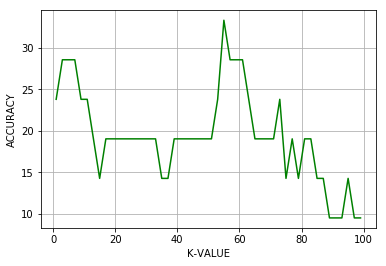

In [79]:
#plot accuracy vs K
import matplotlib.pyplot as plt
plt.plot(k_list,accuracy_list,color='green')
plt.xlabel('K-VALUE')
plt.ylabel('ACCURACY')
plt.grid(True)
plt.show()

In [80]:
TotalDF=pd.concat([train_df, test_df], ignore_index=True)


### From above accuracy values and plot we can say that k=55 has maximum accuracy

In [81]:
knn(55) #accuracy is maximum here


Accuracy: 33.33333333333333% with k= 55


33.33333333333333